# CAB420 Assignment 1A Question 3: Template and Utilities Demo

Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

## Utility Functions

The following cell contains utility functions to:

- Load the data
- Vectorise the data
- Plot images
- Resize all images
- Convert images to grayscale

These are provided to assist you in developing your solution.


In [148]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize

# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)


## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.


(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


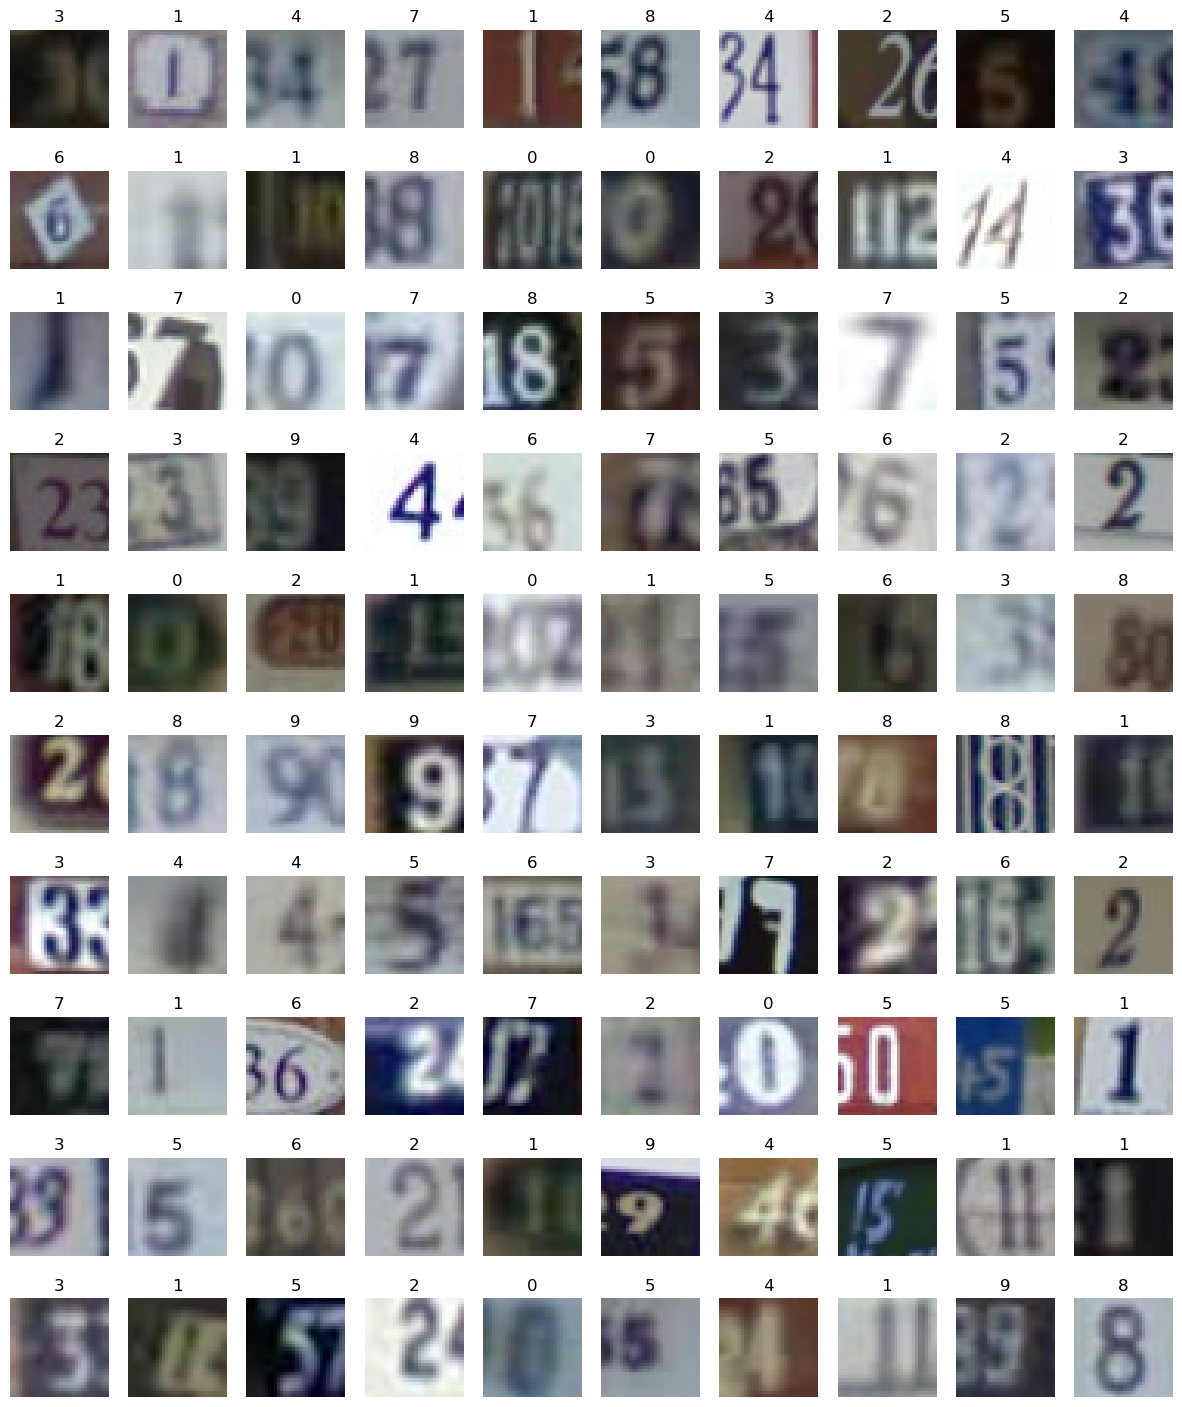

In [149]:
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.


In [150]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:

- Resize images
- Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.


(1000, 20, 20, 1)


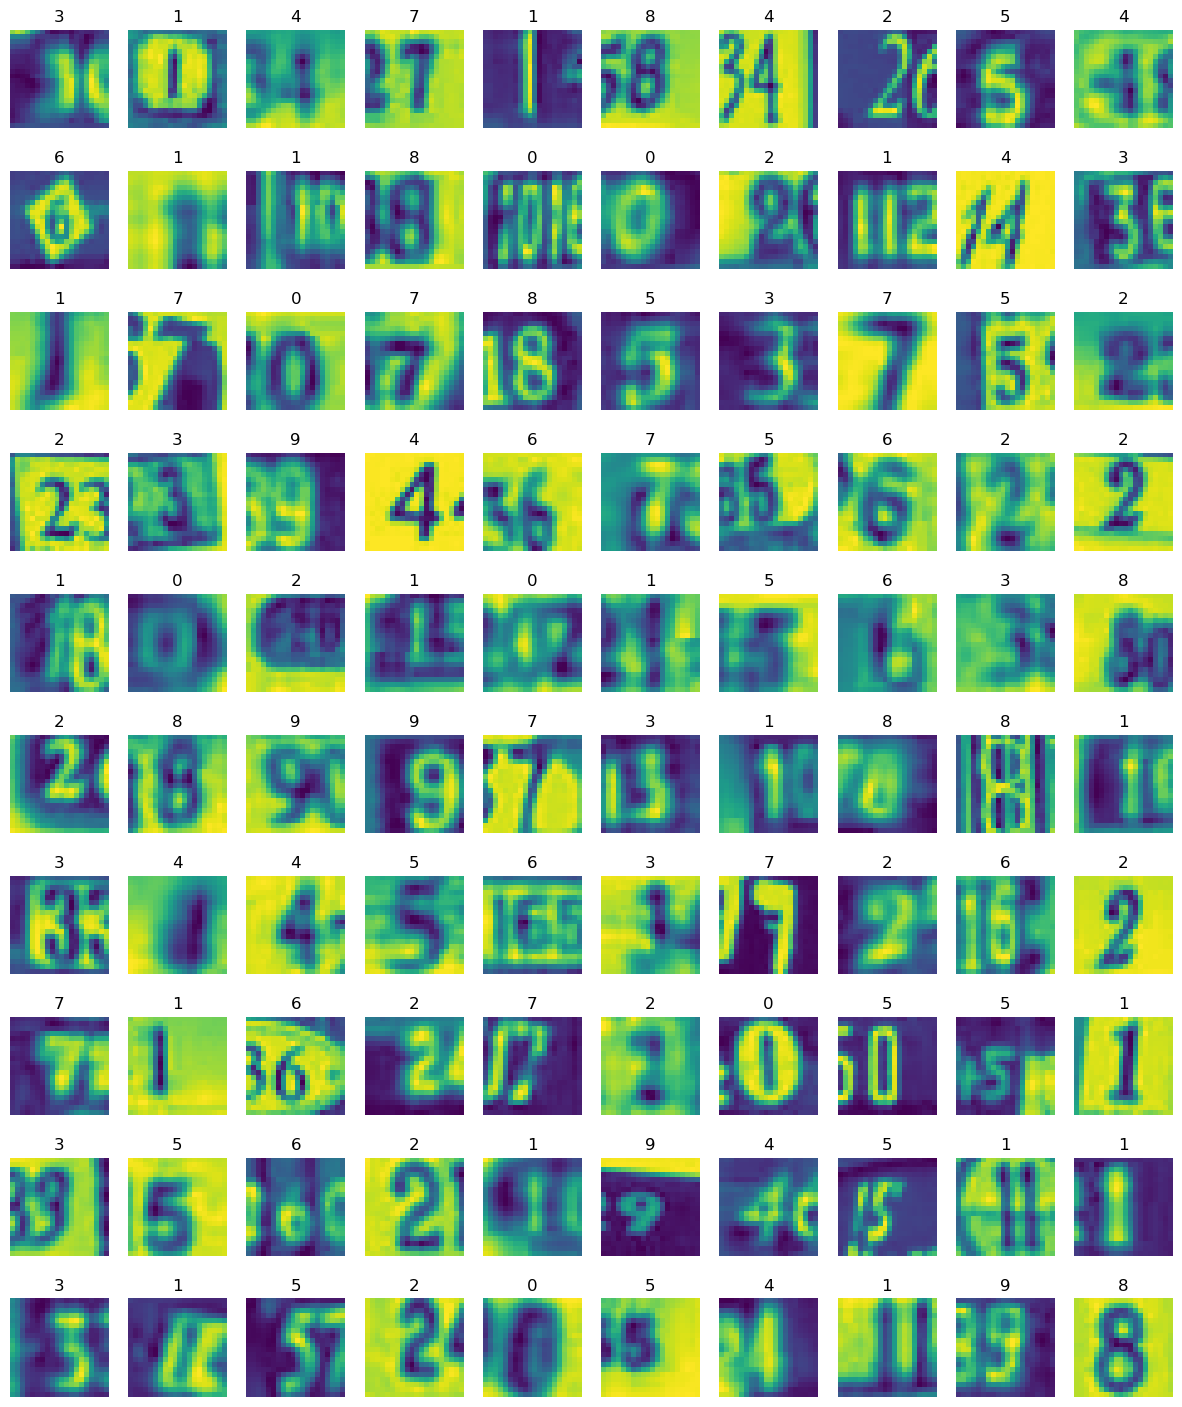

In [151]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use `process_time` within the `time` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:


In [152]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.213227 seconds
Time to resize data: 0.014221 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.


Training Time: 1.480313
Inference Time (training set): 0.596800
Inference Time (testing set): 5.984561


'              precision    recall  f1-score   support\n\n           0       0.22      0.30      0.25       711\n           1       0.37      0.50      0.43      1894\n           2       0.39      0.36      0.37      1497\n           3       0.36      0.33      0.34      1141\n           4       0.34      0.31      0.32      1035\n           5       0.35      0.32      0.34       892\n           6       0.32      0.24      0.28       758\n           7       0.38      0.30      0.34       789\n           8       0.32      0.30      0.31       683\n           9       0.38      0.29      0.33       600\n\n    accuracy                           0.35     10000\n   macro avg       0.34      0.33      0.33     10000\nweighted avg       0.35      0.35      0.35     10000\n'

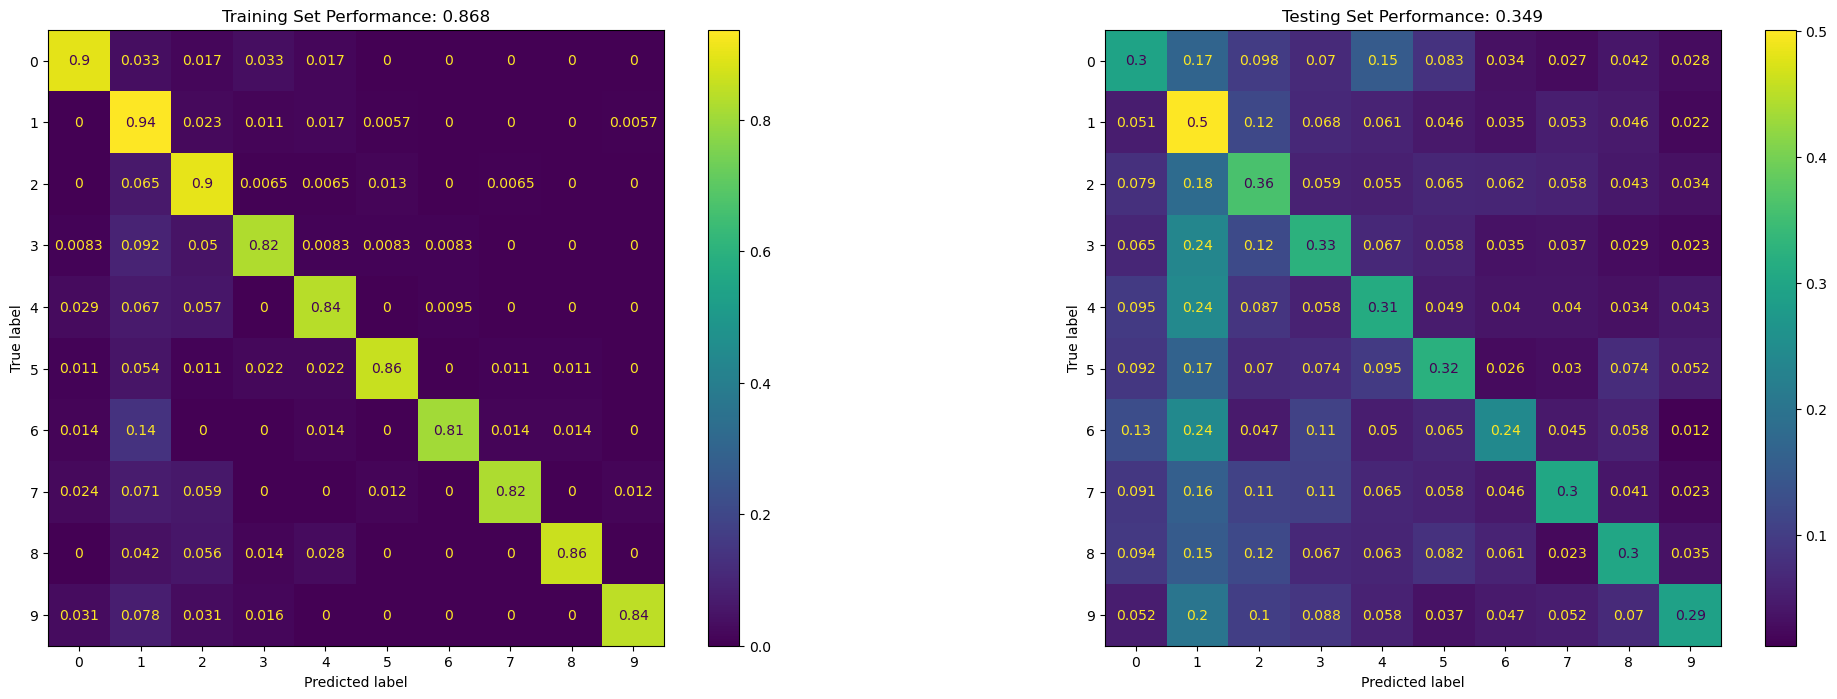

In [153]:
from sklearn.svm import SVC
from time import process_time

# load data
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# any resize, colour change, etc, would go here

# vectorise data
# make sure you vectorise the data you use with the DCNNs as input to the SVM for a fair comparison
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)

# train the SVM
svm_train_start = process_time()
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
svm_train_end = process_time()
train_predictions = svm.predict(train_vector_X)
svm_train_pred_end = process_time()
test_predictions = svm.predict(test_vector_X)
svm_test_pred_end = process_time()

svm_train_time = svm_train_end - svm_train_start
svm_inference_train_time = svm_train_pred_end - svm_train_end
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

# evaluate SVM
# My code
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


def SVM_eval_model(model, X_train, Y_train, X_test, Y_test):
    """
    Evaluates the performance of an SVM model on the training and testing sets.

    Parameters:
    -----------
    model : object
        A trained SVM model object.
    X_train : numpy array
        The feature matrix of the training set.
    Y_train : numpy array
        The target vector of the training set.
    X_test : numpy array
        The feature matrix of the testing set.
    Y_test : numpy array
        The target vector of the testing set.

    Returns:
    --------
    report : str
        A classification report of the model's performance on the testing set.
    """
    if not isinstance(X_train, np.ndarray) or not isinstance(Y_train, np.ndarray) \
        or not isinstance(X_test, np.ndarray) or not isinstance(Y_test, np.ndarray):
        raise ValueError("Input parameters X_train, Y_train, X_test, and Y_test must be NumPy arrays.")

    if X_train.shape[0] != Y_train.shape[0] or X_test.shape[0] != Y_test.shape[0]:
        raise ValueError("Input parameters X_train, Y_train, X_test, and Y_test must have the same number of samples.")

    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)))
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)))
    report = classification_report(Y_test, model.predict(X_test))
    return report


# develop, evaluate and compare DCNNs
# My code

# evaluate SVM
SVM_eval_model(svm, train_vector_X, train_Y, test_vector_X, test_Y)


#### DCNN


In [154]:
# imports
import time
import numpy as np
import numpy
import scipy.io
import cv2
from tensorboard import notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from skimage.color import convert_colorspace
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout



#### Model Definition

In [155]:
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# 3x3 conv block, we have two conv layers, and a max-pooling. The conv layers have identical parameters
# and are simply separated by an activation, in our case, relu
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(inputs)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, increase filters, same structure as above, but now with 16 filters
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, further increase filters to 32, again the structure is the same
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation=None)(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# flatten layer
x = layers.Flatten()(x)

# dense layer, 512 neurons
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='CNN')
model_cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 activation_42 (Activation)  (None, 32, 32, 8)         0         
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 activation_43 (Activation)  (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                            
                                                               

#### Without Augmentation

In [156]:
(train, train_Y), (test, test_Y) = keras.datasets.cifar10.load_data()

train_Y = to_categorical(train_Y, 10)
test_Y = to_categorical(test_Y, 10)

In [157]:
def train_and_eval(model, train, train_y, test, test_y):

    # compile the network
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

    # fit the model
    history = model.fit(train, train_y,
                        batch_size=128,
                        epochs=12,
                        validation_data=(test, test_y), verbose=False)

    # plot training and validation loss and accuracy
    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    # plot confusion matrices and F1 scores
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    pred = model.predict(train, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    ax = fig.add_subplot(1, 2, 2)    
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
     
  

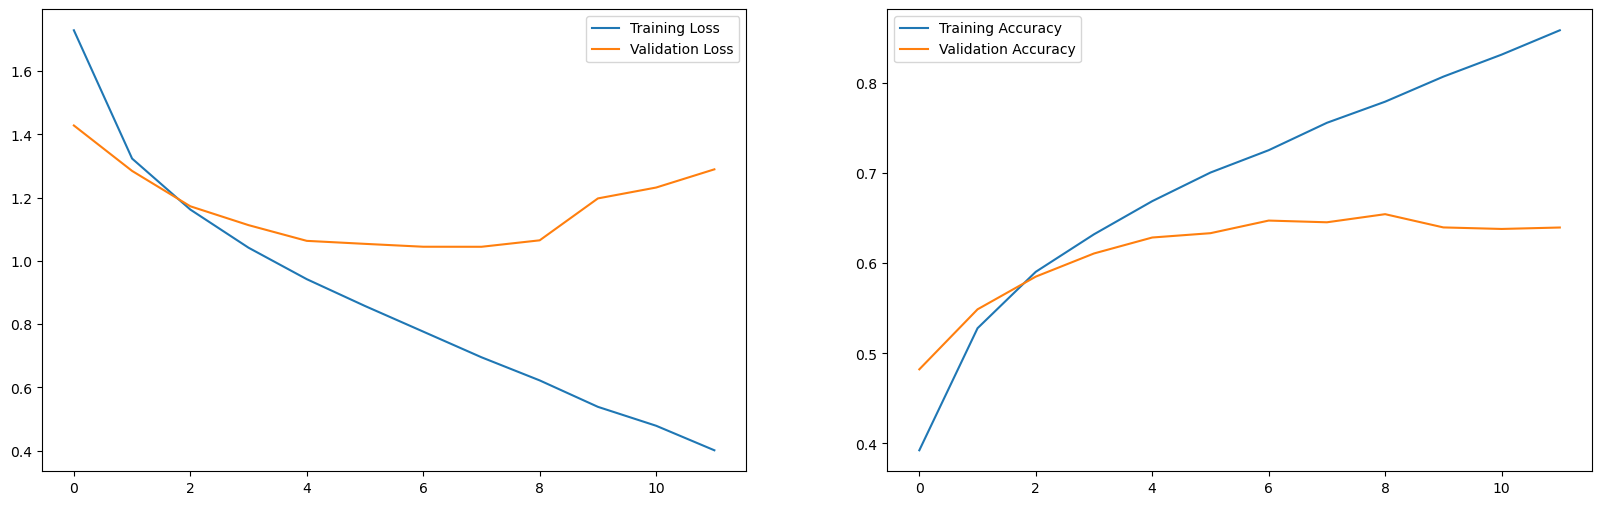

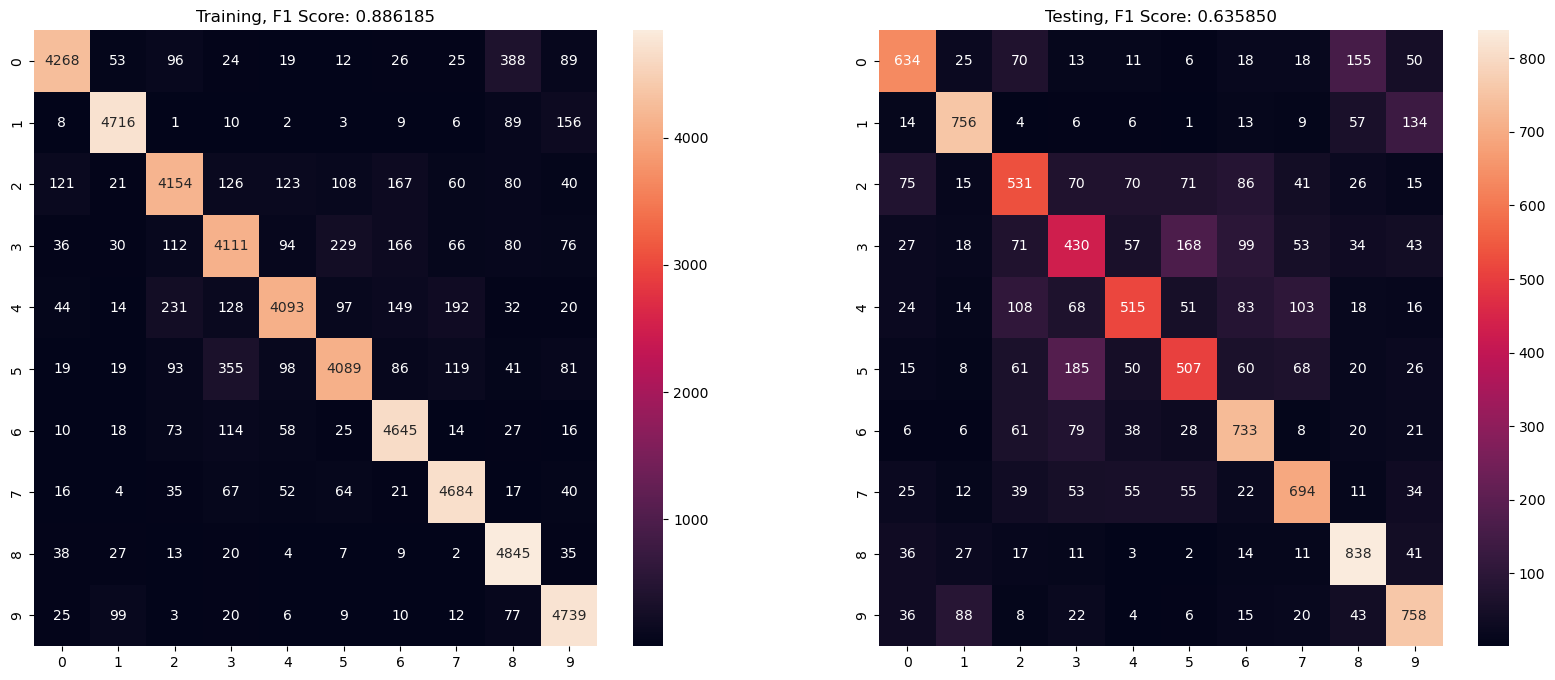

In [158]:
train_and_eval(model_cnn, train, train_Y, test, test_Y) 

#### With Augmentation

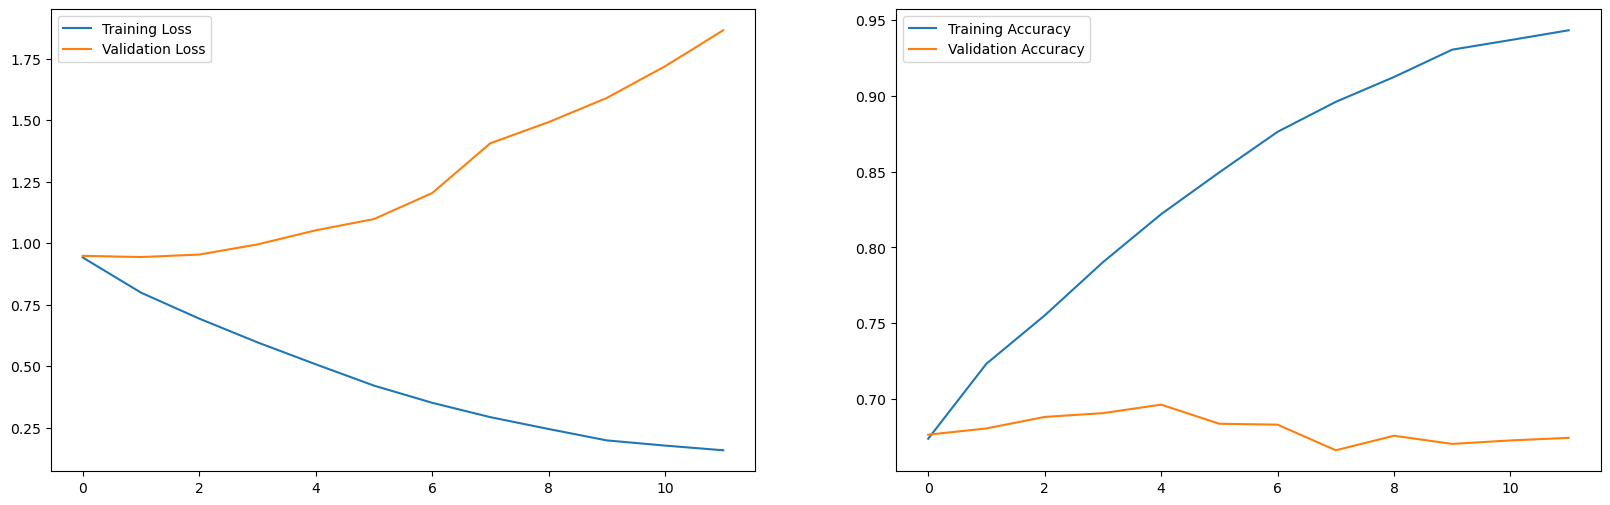

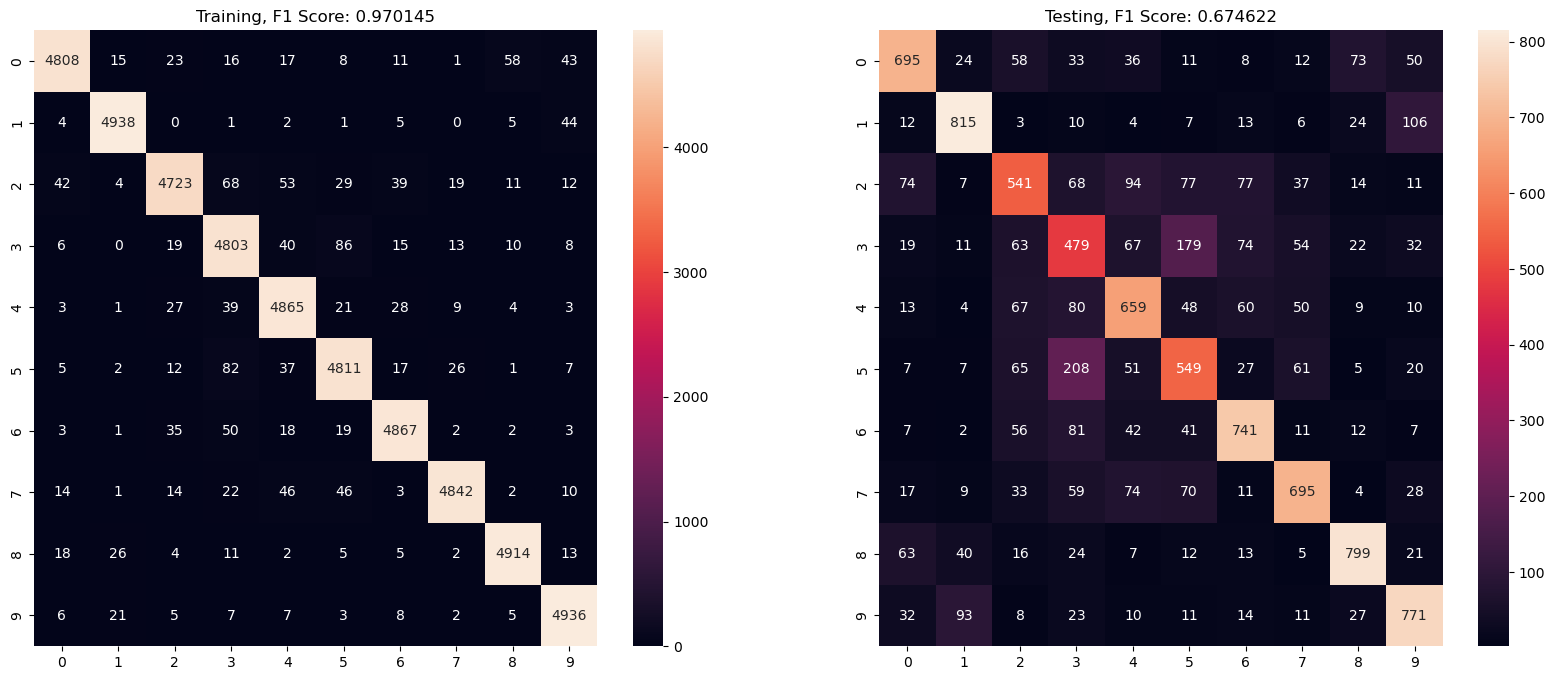

In [159]:
datagen = ImageDataGenerator(
                            # rotate between -5, +5 degrees
                            rotation_range=5,
                            # horiziontal shift by +/- 5% of the image width
                            width_shift_range=0.05,
                            # vertical shift by +/- 5% of the image width
                            height_shift_range=0.05,
                            # range for zooming
                            zoom_range=0.1,
                            # allow horizontal flips of data
                            horizontal_flip=True,
                            # what value to place in new pixels, given the nature of our data (clothes on a black backround)
                            # we'll set this to a constant value of 0
                            fill_mode='constant', cval=0)

model_cnn = model_cnn
model_cnn.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])


history = model_cnn.fit(datagen.flow(train, train_Y, batch_size=16),
                    steps_per_epoch=1800 // 16,
                    epochs=100,
                    validation_data=(test, test_Y), verbose=False)

train_and_eval(model_cnn, train, train_Y, test, test_Y) 
